In [4]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings("ignore")

In [5]:
train_level2 = pd.read_pickle("stack_level2/train_level2_lgb+rf+xgb.pickle")
y = pd.read_pickle("train_y.pickle")

In [6]:
train_level2

,lgb,rf,xgb
0,2.716346,2.614505,2.502258
1,1.043462,0.977205,0.981206
2,1.529319,1.691366,1.447847
3,0.229679,0.302148,0.218890
4,0.193352,0.274077,0.220300
5,4.272202,3.676993,4.394917
6,0.716944,1.000690,0.658735
7,0.755597,0.641749,0.670025
8,0.994936,0.977205,0.975523
9,0.641913,1.000690,0.610497


In [15]:
all_data = pd.read_pickle("train_with_test.pickle")

In [33]:
lag1 = all_data[(all_data["date_block_num"]>=24) & (all_data["date_block_num"]!=34)].target_lag_1

In [41]:
lag1

0           5.0
1           0.0
2           3.0
3           0.0
4           0.0
5           8.0
6           2.0
7           1.0
8           0.0
9           2.0
10          0.0
11          1.0
12          1.0
13          0.0
14          0.0
15          1.0
16          1.0
17          1.0
18          1.0
19          0.0
20          1.0
21          2.0
22          3.0
23          0.0
24          2.0
25          1.0
26          5.0
27          4.0
28         14.0
29          7.0
           ... 
2485547     0.0
2485548     0.0
2485549     0.0
2485550     0.0
2485551     0.0
2485552     0.0
2485553     0.0
2485554     0.0
2485555     0.0
2485556     0.0
2485557     0.0
2485558     0.0
2485559     1.0
2485560     0.0
2485561     0.0
2485562     0.0
2485563     0.0
2485564     0.0
2485565     0.0
2485566     0.0
2485567     0.0
2485568     0.0
2485569     0.0
2485570     0.0
2485571     0.0
2485572     0.0
2485573     0.0
2485574     0.0
2485575     0.0
2485576     0.0
Name: target_lag_1, Leng

In [38]:
train_level2["lag1"] = lag1


In [39]:
train_level2

,lgb,rf,xgb,lag1
0,2.716346,2.614505,2.502258,5.0
1,1.043462,0.977205,0.981206,0.0
2,1.529319,1.691366,1.447847,3.0
3,0.229679,0.302148,0.218890,0.0
4,0.193352,0.274077,0.220300,0.0
5,4.272202,3.676993,4.394917,8.0
6,0.716944,1.000690,0.658735,2.0
7,0.755597,0.641749,0.670025,1.0
8,0.994936,0.977205,0.975523,0.0
9,0.641913,1.000690,0.610497,2.0


In [42]:
y.reset_index(drop=True, inplace=True)

In [43]:
train_level2["target"] = y

In [47]:
train_level2.drop("target", axis=1, inplace=True)

In [45]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
RF_model = RandomForestRegressor(n_estimators=20, min_samples_leaf=100)
RF_model.fit(train_level2, y.values)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=100, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [51]:
train_y_pred = RF_model.predict(train_level2)
train_y_pred

array([ 2.64912691,  1.33859788,  1.24668557, ...,  0.05514971,
        0.04058359,  0.06828833])

In [54]:
y.values[:100]

array([  2.,   1.,   3.,   1.,   1.,   2.,   1.,   4.,  17.,   2.,   1.,
         1.,   1.,   1.,   1.,   1.,   2.,   2.,   1.,   3.,   1.,   2.,
         1.,   1.,   1.,   2.,   7.,   2.,   8.,   4.,   2.,   1.,   1.,
         1.,   1.,   4.,   1.,   2.,  20.,   1.,   7.,  11.,   1.,   3.,
         2.,   2.,   1.,   1.,   3.,   6.,   1.,   1.,   1.,   3.,   5.,
         7.,   1.,   1.,   2.,   1.,   1.,   5.,   1.,   1.,   1.,   1.,
         1.,   1.,   3.,   3.,   2.,   1.,   1.,   1.,   2.,   2.,   3.,
         1.,   1.,   1.,   2.,   5.,   6.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         3.], dtype=float32)

In [56]:
train_y_pred[:100]

array([  2.64912691,   1.33859788,   1.24668557,   0.22230176,
         0.19889571,   4.03700393,   0.54075094,   0.78689927,
         1.43290503,   0.44194712,   0.03051296,   0.8225489 ,
         0.36508352,   0.3721801 ,   0.3721801 ,   0.48751969,
         0.5136382 ,   0.78474698,   1.16900021,   1.02020395,
         0.89323132,   1.45615419,   1.55070783,   0.25921968,
         1.25454818,   0.55113532,   4.43861884,   2.01709278,
         7.27936029,   3.49036828,   4.5778263 ,   0.17126876,
         0.19914084,   0.17126876,   0.19889571,   3.63137526,
         0.08028028,   0.99435491,   9.50786341,   0.56991873,
         1.06953045,   9.29342388,   1.1569759 ,   2.55396476,
         1.02426139,   1.15800168,   0.13239727,   0.09111595,
         3.52533039,   7.59878943,   1.33124608,   0.18322758,
         0.19460303,   0.28711027,   0.45706604,   2.95150365,
         0.74236009,   0.63639326,   1.48658325,   1.30913924,
         0.26365432,   1.37071693,   0.23589944,   0.92

# To predict

In [50]:
rf  = pd.read_csv("submission/submission_RF_model.csv")
xgb = pd.read_csv("submission/submission_xgboost.csv")
lgb = pd.read_csv("submission/submission_lightgbm.csv")

In [57]:
test_level2 = pd.DataFrame()
test_level2["lgb"] = lgb["item_cnt_month"]
test_level2["rf"]  = rf["item_cnt_month"]
test_level2["xgb"] = xgb["item_cnt_month"]
test_level2.head()

,lgb,rf,xgb
0,0.299282,0.338588,0.281057
1,0.198649,0.059308,0.164724
2,0.763837,0.573056,0.579070
3,0.406244,0.342845,0.375013
4,1.955830,0.473250,2.041888


In [58]:
lag = all_data[all_data["date_block_num"] == 34].target_lag_1
lag.reset_index(drop=True, inplace = True)
test_level2["lag1"] = lag

In [59]:
test_level2

,lgb,rf,xgb,lag1
0,0.299282,0.338588,0.281057,0.0
1,0.198649,0.059308,0.164724,0.0
2,0.763837,0.573056,0.579070,1.0
3,0.406244,0.342845,0.375013,0.0
4,1.955830,0.473250,2.041888,0.0
5,0.476391,0.573056,0.413908,1.0
6,0.761644,0.710632,0.835669,2.0
7,0.146772,0.139150,0.136082,0.0
8,0.369085,0.401777,0.309979,0.0
9,0.729594,0.548487,0.638667,0.0


In [60]:
test_y = RF_model.predict(test_level2)

In [62]:
test_y[:10]

array([ 0.27968265,  0.28326698,  0.79067399,  0.31526606,  1.45364426,
        0.5017507 ,  0.80969228,  0.15713495,  0.42316092,  0.92090873])

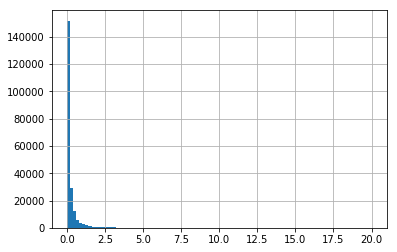

In [64]:
pd.Series(test_y).hist(bins = 100)

In [67]:
sample = pd.read_csv("../sample_submission.csv")
sample["item_cnt_month"] = test_y
sub = sample
sub.to_csv("submission/submission_new.csv", index = False)
!kaggle competitions submit -c competitive-data-science-predict-future-sales -f submission/submission_new.csv -m "Message"


Successfully submitted to Predict Future Sales